# Analyzing Healthcare Provider Shortage - Part 3/4

In this part of the study, we will explore shortage of Mental Healthcare Providers and OB-GYN Providers. We will study the distribution of:
 - Providers across all states to identify which states have the most shortage and
 - for those states study shortage at the county level to understand which counties are suffering the most

In this section, we will:

 - Explore Mental Healthcare Providers
     - Study how Mental Healthcare Providers vary by Population Density accross all states
     - Identify state with highest people to provider ratio
     - Explore the state with highest ratio to understand how providers vary across different counties for that state
 - Explore OBGYN Healthcare Providers
     - Study how OBGYN Healthcare Providers vary by population of mothers accross all states
     - Identify state with highest mothers to provider ratio
     - Explore the state with highest ratio to understand how providers vary across different counties for that state

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-Data-Layers" data-toc-modified-id="Get-Data-Layers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get Data Layers</a></span><ul class="toc-item"><li><span><a href="#Get-Provider-Data" data-toc-modified-id="Get-Provider-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get Provider Data</a></span></li><li><span><a href="#Get-Demographics-Data" data-toc-modified-id="Get-Demographics-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Get Demographics Data</a></span></li></ul></li><li><span><a href="#Mental-Health" data-toc-modified-id="Mental-Health-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mental Health</a></span><ul class="toc-item"><li><span><a href="#Mental-Healthcare-Providers---Heat-Map" data-toc-modified-id="Mental-Healthcare-Providers---Heat-Map-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Mental Healthcare Providers - Heat Map</a></span></li><li><span><a href="#Population-to-Providers-Ratio-by-State" data-toc-modified-id="Population-to-Providers-Ratio-by-State-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Population to Providers Ratio by State</a></span><ul class="toc-item"><li><span><a href="#Dataframe-for-Mental-Healthcare-providers-by-state" data-toc-modified-id="Dataframe-for-Mental-Healthcare-providers-by-state-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Dataframe for Mental Healthcare providers by state</a></span></li><li><span><a href="#Dataframe-for-Population-by-State" data-toc-modified-id="Dataframe-for-Population-by-State-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Dataframe for Population by State</a></span></li><li><span><a href="#Merge-Provider-Count-and-Population-Dataframes" data-toc-modified-id="Merge-Provider-Count-and-Population-Dataframes-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Merge Provider Count and Population Dataframes</a></span></li><li><span><a href="#Plot-Shortage" data-toc-modified-id="Plot-Shortage-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Plot Shortage</a></span><ul class="toc-item"><li><span><a href="#Define-Renderer" data-toc-modified-id="Define-Renderer-2.2.4.1"><span class="toc-item-num">2.2.4.1&nbsp;&nbsp;</span>Define Renderer</a></span></li><li><span><a href="#Plot-Map" data-toc-modified-id="Plot-Map-2.2.4.2"><span class="toc-item-num">2.2.4.2&nbsp;&nbsp;</span>Plot Map</a></span></li></ul></li><li><span><a href="#Plot-Population-per-Mental-Healthcare-Provider" data-toc-modified-id="Plot-Population-per-Mental-Healthcare-Provider-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Plot Population per Mental Healthcare Provider</a></span></li></ul></li><li><span><a href="#Exploring-Mississippi" data-toc-modified-id="Exploring-Mississippi-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploring Mississippi</a></span><ul class="toc-item"><li><span><a href="#Dataframe-for-Population-in-Mississippi" data-toc-modified-id="Dataframe-for-Population-in-Mississippi-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Dataframe for Population in Mississippi</a></span></li><li><span><a href="#Dataframe-for-Mental-Healthcare-Providers-in-Mississippi-by-County" data-toc-modified-id="Dataframe-for-Mental-Healthcare-Providers-in-Mississippi-by-County-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Dataframe for Mental Healthcare Providers in Mississippi by County</a></span></li><li><span><a href="#Merge-Provider-Count-and-Population-Dataframes-for-MS" data-toc-modified-id="Merge-Provider-Count-and-Population-Dataframes-for-MS-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Merge Provider Count and Population Dataframes for MS</a></span></li><li><span><a href="#Plot-Shortage" data-toc-modified-id="Plot-Shortage-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Plot Shortage</a></span><ul class="toc-item"><li><span><a href="#Define-Renderer" data-toc-modified-id="Define-Renderer-2.3.4.1"><span class="toc-item-num">2.3.4.1&nbsp;&nbsp;</span>Define Renderer</a></span></li><li><span><a href="#Plot-Map" data-toc-modified-id="Plot-Map-2.3.4.2"><span class="toc-item-num">2.3.4.2&nbsp;&nbsp;</span>Plot Map</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Women's-Health" data-toc-modified-id="Women's-Health-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Women's Health</a></span><ul class="toc-item"><li><span><a href="#OBGYN-Providers---Heat-Map" data-toc-modified-id="OBGYN-Providers---Heat-Map-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>OBGYN Providers - Heat Map</a></span></li><li><span><a href="#Mothers-to-Providers-Ratio-by-State" data-toc-modified-id="Mothers-to-Providers-Ratio-by-State-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Mothers to Providers Ratio by State</a></span><ul class="toc-item"><li><span><a href="#Get-the-layers" data-toc-modified-id="Get-the-layers-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Get the layers</a></span></li><li><span><a href="#Dataframe-for-women-population-by-State" data-toc-modified-id="Dataframe-for-women-population-by-State-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Dataframe for women population by State</a></span></li><li><span><a href="#Dataframe-for-OB-GYN-providers-by-state" data-toc-modified-id="Dataframe-for-OB-GYN-providers-by-state-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Dataframe for OB-GYN providers by state</a></span></li><li><span><a href="#Merge-Provider-Count-and-Population-Dataframes" data-toc-modified-id="Merge-Provider-Count-and-Population-Dataframes-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Merge Provider Count and Population Dataframes</a></span></li><li><span><a href="#Plot-Shortage" data-toc-modified-id="Plot-Shortage-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Plot Shortage</a></span><ul class="toc-item"><li><span><a href="#Define-Renderer" data-toc-modified-id="Define-Renderer-3.2.5.1"><span class="toc-item-num">3.2.5.1&nbsp;&nbsp;</span>Define Renderer</a></span></li><li><span><a href="#Plot-Map" data-toc-modified-id="Plot-Map-3.2.5.2"><span class="toc-item-num">3.2.5.2&nbsp;&nbsp;</span>Plot Map</a></span></li></ul></li><li><span><a href="#Plot-Mothers-per-OBGYN-Provider" data-toc-modified-id="Plot-Mothers-per-OBGYN-Provider-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Plot Mothers per OBGYN Provider</a></span></li></ul></li><li><span><a href="#Exploring-North-Dakota" data-toc-modified-id="Exploring-North-Dakota-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Exploring North Dakota</a></span><ul class="toc-item"><li><span><a href="#Dataframe-for-women-population-in-North-Dakota" data-toc-modified-id="Dataframe-for-women-population-in-North-Dakota-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Dataframe for women population in North Dakota</a></span></li><li><span><a href="#Dataframe-for-OB-GYN-providers-in-North-Dakota-by-County" data-toc-modified-id="Dataframe-for-OB-GYN-providers-in-North-Dakota-by-County-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Dataframe for OB-GYN providers in North Dakota by County</a></span></li><li><span><a href="#Merge-Provider-Count-and-Population-Dataframes" data-toc-modified-id="Merge-Provider-Count-and-Population-Dataframes-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Merge Provider Count and Population Dataframes</a></span></li><li><span><a href="#Plot-Shortage" data-toc-modified-id="Plot-Shortage-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Plot Shortage</a></span><ul class="toc-item"><li><span><a href="#Define-Renderer" data-toc-modified-id="Define-Renderer-3.3.4.1"><span class="toc-item-num">3.3.4.1&nbsp;&nbsp;</span>Define Renderer</a></span></li><li><span><a href="#Plot-Map" data-toc-modified-id="Plot-Map-3.3.4.2"><span class="toc-item-num">3.3.4.2&nbsp;&nbsp;</span>Plot Map</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Part 3: Provider Shortage - Mental Health and OB-GYN Providers

In [1]:
# Import Libraries
from IPython.display import display

# Import arcgis
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

# Import libraries for data exploration
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

# Import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for time
import time

In [2]:
# Create a GIS connection
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

## Get Data Layers

Provider data was geocoded using the GeoAnalytics server. We will get the geocoded [provider data feature layer](https://datascienceqa.esri.com/portal/home/item.html?id=650c5000430a49a6850d93f2434d359a). We will also get demographic data from the 2018 USA Population Density layer.

### Get Provider Data

In [3]:
# Search the feature layer
search_result = gis.content.search('title: provider_data_geocoded_7_30', 'Feature Layer')
search_result

[<Item title:"provider_data_geocoded_7_30" type:Feature Layer Collection owner:portaladmin>]

<Item title:"provider_data_geocoded_7_30" type:Feature Layer Collection owner:portaladmin>
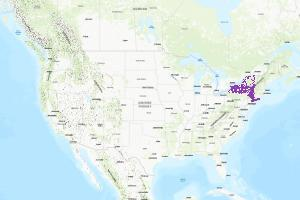

In [4]:
# Get the feature layer item
provider_data_item = search_result[0]
provider_data_item

In [5]:
# Check for layers inside the item
provider_data_item.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_data_geocoded_7_30/FeatureServer/0">]

In [6]:
# Get the layer needed for analysis
provider_data_layer = provider_data_item.layers[0]
provider_data_layer

<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_data_geocoded_7_30/FeatureServer/0">

In [7]:
# Look at the first 5 fields and their data types
for f in provider_data_layer.properties.fields[:5]:
    print(f['name'],'      ',f['type'])

objectid        esriFieldTypeOID
user_npi        esriFieldTypeDouble
user_entity_type        esriFieldTypeString
user_address        esriFieldTypeString
user_address2        esriFieldTypeString


### Get Demographics Data
<a name="demographic-data"></a>

<Item title:"2018 USA Population Density" type:Map Image Layer owner:esri_livingatlas>
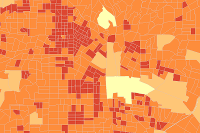

In [8]:
# Search for and get Population data layer
popdensity = gis.content.get('ab4e1996d588405d9cd68348ef660f70')
popdensity

In [9]:
# Check first 5 layers in population Density
popdensity.layers[:5]

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/4">]

In [10]:
# Look at first few field names for county layer
county_layer = popdensity.layers[46]
print('FIELD NAME', '\t\t', 'FIELD ALIAS')
for field in county_layer.properties.fields[:10]:
    print(field['name'], '\t\t', field['alias'])

FIELD NAME 		 FIELD ALIAS
OBJECTID 		 OBJECTID
Shape 		 Shape
ID 		 ID
NAME 		 NAME
STATE_NAME 		 STATE_NAME
ST_ABBREV 		 ST_ABBREV
AREA 		 Area in Square Miles (Calculated)
TOTPOP_CY 		 2018 Total Population (Esri)
HHPOP_CY 		 2018 Household Population (Esri)
FAMPOP_CY 		 2018 Family Population (Esri)


In [11]:
# Get specific attributes for Counties
import time
start_time = time.time()

county_layer = popdensity.layers[46]
county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    chunk_df = county_layer.query(out_fields=['Shape','ST_ABBREV','NAME','ASIAN_CY','AMERIND_CY','AVGHHSZ_CY','AVGHINC_CY','BLACK_CY','EDUCBASECY','HISPPOP_CY',
                          'MEDAGE_CY','MINORITYCY','OTHRACE_CY','PCI_CY','POPDENS_CY','UNEMPRT_CY','WHITE_CY','SMCOLL_CY',
                          'ASSCDEG_CY','BACHDEG_CY','GRADDEG_CY','TOTPOP_CY'],return_all_records=False,result_offset=offset,result_record_count=750,as_df=True)
    county_df = pd.concat([chunk_df, county_df], ignore_index=True)
    
    offset += 750
    
duration = time.time()-start_time
print(f'Elapsed time: {duration/60:.2f} mins')

Elapsed time: 0.92 mins


In [12]:
county_df.shape

(3142, 23)

## Mental Health

<img src="MentalHealth.png">
Image source: https://cuindependent.com/2019/03/08/opinion-mental-health-education/

- Nearly [one in five](https://www.samhsa.gov/data/sites/default/files/NSDUH-FFR1-2015/NSDUH-FFR1-2015/NSDUH-FFR1-2015.pdf) people in the U.S. have some sort of mental health condition. 
- Adults living with serious mental illness [die on average 25 years earlier](https://www.nami.org/Learn-More/Mental-Health-By-the-Numbers) than others.
- Suicide is the [2nd leading cause of death](https://www.nimh.nih.gov/health/statistics/suicide.shtml) for people aged 10–34.

### Mental Healthcare Providers - Heat Map
Let's explore the distribution of mental health providers in US using a heatmap.


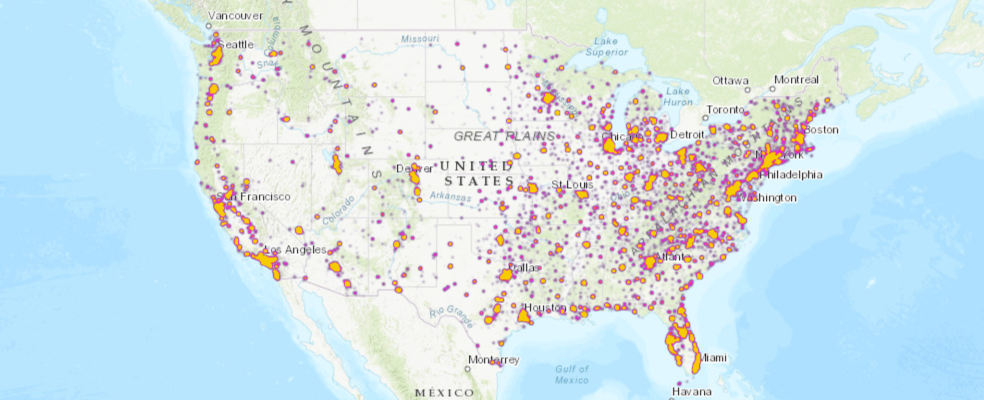

In [15]:
# Create a map
mental_map = gis.map('USA', 4)
mental_map

In [14]:
# Add provider data to map
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
            "type": "heatmap",
            "blurRadius":1,  # changes the size of the clusters
            "maxPixelIntensity":2,
            "minPixelIntensity":0,
            "field":None}
renderer["colorStops"] = [{"ratio":0,"color":[63, 40, 102, 0]},
                          {"ratio":0.25,"color":[167,97,170,179]},
                          {"ratio":0.50,"color":"#7b3ce9"},
                          {"ratio":0.75,"color":[222,102,0,179]},
                          {"ratio":1,"color":[244,204,0,179]}]
mental_map.add_layer(provider_data_layer,
               { "type": "FeatureLayer",
                 "renderer": renderer,
                "definition_expression" : "user_taxonomy_code_1 in ('2084P0800X','207QG0300X','273R00000X','103T00000X','103TA0400X','103TA0700X','103TC0700X','103TC2200X','103TB0200X','103TC1900X','103TE1000X','103TE1100X','103TF0000X','103TF0200X','103TP2701X','103TH0004X','103TH0100X','103TM1700X','103TM1800X','103TP0016X','103TP0814X','103TP2700X','103TR0400X','103TS0200X','103TW0100X','106E00000X','106S00000X','2084A0401X','2084P0802X','2084B0002X','2084P0804X','2084N0600X','2084D0003X','2084F0202X','2084P0805X','2084H0002X','2084P0005X','2084N0400X','2084N0402X','2084N0008X','2084P2900X','2084P0015X','2084S0012X','2084S0010X','2084V0102X','364SP0808X','364SP0809X','364SP0807X','364SP0810X','364SP0811X','364SP0812X','364SP0813X','283Q00000X','261QM0801X')"
               })

In [28]:
mental_map.remove_layers()

True

This map paints a grim picture of the availability of mental healthcare providers. There are states in every region with vast areas of NO mental health providers or very few providers. To list, some of these states include:
- Midwest: The Dakotas, Montana, Wyoming, Colorado, Nebraska, Kansas
- South: Texas, New Mexico, Kansas, Louisiana, Mississippi, Alabama
- West: Nevada, Arizona, Oregon, Idaho, Alaska
- East: Maine, Vermont, Michigan

### Population to Providers Ratio by State
Let's find out the ratio of population to mental healthcare providers to understand which states have the least number of providers.

#### Dataframe for Mental Healthcare providers by state
We will use `provider_data_layer` to subset mental healthcare providers

The operation to filter the layer for specific provider specialities takes a considerable amount of time and is performed on the server side.

In [13]:
# Get provider data for mental healthcare providers only

%time mental_df = provider_data_layer.query(where="user_taxonomy_code_1 in ('2084P0800X','207QG0300X','273R00000X','103T00000X','103TA0400X','103TA0700X','103TC0700X','103TC2200X','103TB0200X','103TC1900X','103TE1000X','103TE1100X','103TF0000X','103TF0200X','103TP2701X','103TH0004X','103TH0100X','103TM1700X','103TM1800X','103TP0016X','103TP0814X','103TP2700X','103TR0400X','103TS0200X','103TW0100X','106E00000X','106S00000X','2084A0401X','2084P0802X','2084B0002X','2084P0804X','2084N0600X','2084D0003X','2084F0202X','2084P0805X','2084H0002X','2084P0005X','2084N0400X','2084N0402X','2084N0008X','2084P2900X','2084P0015X','2084S0012X','2084S0010X','2084V0102X','364SP0808X','364SP0809X','364SP0807X','364SP0810X','364SP0811X','364SP0812X','364SP0813X','283Q00000X','261QM0801X')", 
                          out_fields='user_npi,user_entity_type,user_provider_gender,user_taxonomy_code_1,user_full_address,postal,city,subregion,region,regionabbr', as_df=True)


Elapsed time: 19.38 mins


In [62]:
# Create a csv
mental_df.to_csv(r'C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\DATAFRAMES\allMentalProviders_df.csv', index=None, header=True)

In [12]:
# # Read from csv
# mental_df = pd.read_csv(r'C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\DATAFRAMES\allMentalProviders_df.csv', low_memory=False)
# mental_df.head()

objectid      user_npi user_entity_type user_provider_gender  \
0        50  1.366445e+09       Individual                    M   
1       110  1.760501e+09       Individual                    F   
2       113  1.023011e+09       Individual                    M   
3       118  1.942508e+09     Organization                  NaN   
4       122  1.508862e+09       Individual                    M   

  user_taxonomy_code_1                                  user_full_address  \
0           2084N0400X  642 ULUKAHIKI ST, SUITE 300, KAILUA, HI 967344400   
1           103T00000X          648 E GLEN OAK ST, , RIALTO, CA 923766648   
2           103T00000X  224 E WILLAMETTE AVE, , COLORADO SPRINGS, CO 8...   
3           2084P0800X  4343 W FLAGLER ST STE 100, , CORAL GABLES, FL ...   
4           2084P0800X  790 GOV. CARLOS G. CAMACHO RD., , TAMUNING, GU...   

  postal              city                    subregion      region  \
0  96734            Kailua  City and County of Honolulu      Hawaii   
1  92376            Rialto        San Bernardino County  California   
2  80903  Colorado Springs               El Paso County    Colorado   
3  33134             Miami            Miami-Dade County     Florida   
4  96913          Tamuning                          NaN        Guam   

  regionabbr                                              SHAPE  
0         HI  {'x': -157.75842118599996, 'y': 21.38069594300...  
1         CA  {'x': -117.35748267199995, 'y': 34.09373249300...  
2         CO  {'x': -104.81990027499995, 'y': 38.84235050400...  
3         FL  {'x': -80.26657097299994, 'y': 25.771643515000...  
4         GU  {'x': 144.7754183520001, 'y': 13.5051031310000...

In [17]:
# Create dataframe of mental healthcare provider counts by state
mental_count_df = pd.DataFrame(mental_df['regionabbr'].value_counts().reset_index().values, columns=['regionabbr','Provider_Count'])

Text(0, 0.5, 'Provider Count')

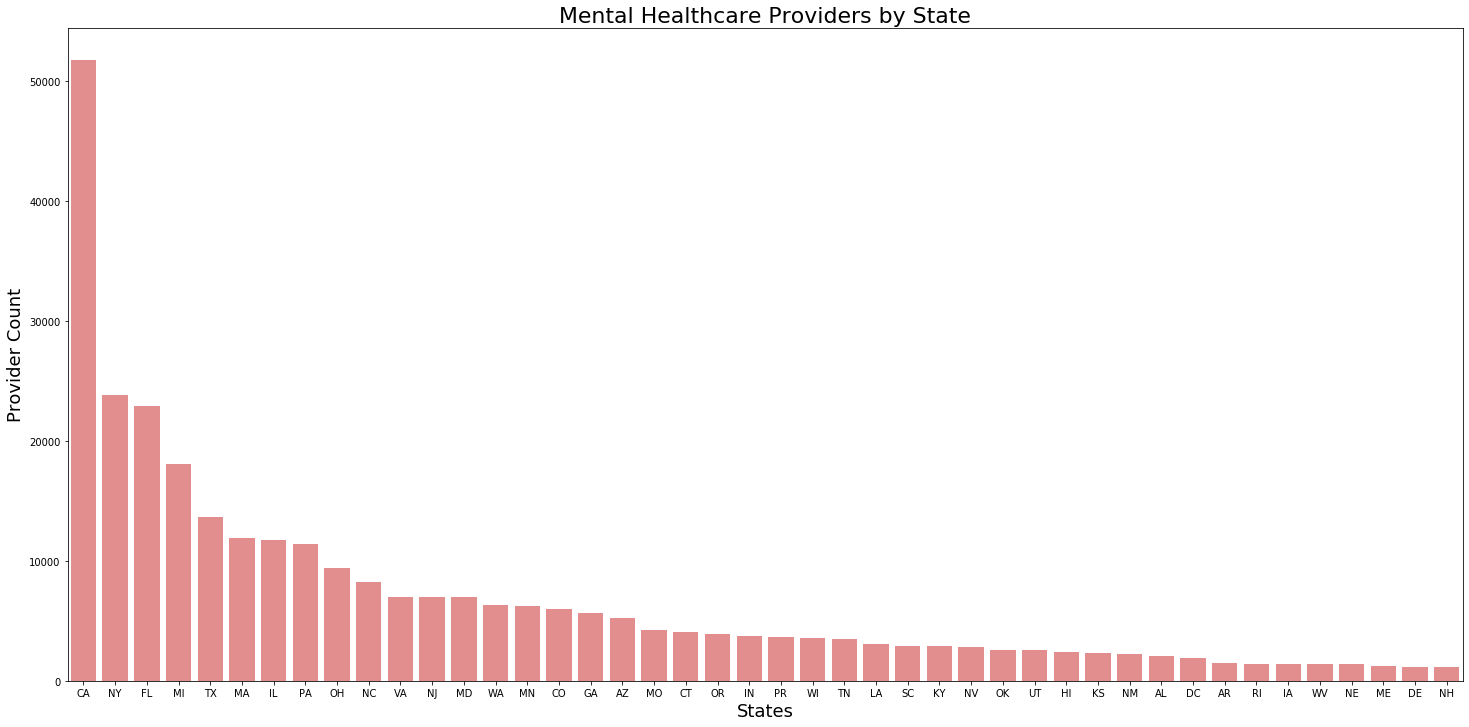

In [18]:
# Plot mental healthcare Providers by State

plt.figure(figsize=(25,12))
sns.barplot(mental_count_df['regionabbr'].iloc[:-19], mental_count_df['Provider_Count'].iloc[:-19],color='lightcoral')
plt.title('Mental Healthcare Providers by State', fontsize=22)
plt.xlabel('States', fontsize=18)
plt.ylabel('Provider Count', fontsize=18)

#### Dataframe for Population by State 
We will use the population density layer at state level to create this dataframe

In [22]:
# State population dataframe
state_layer = popdensity.layers[43]
%time state_df = state_layer.query(out_fields='STATE_NAME,ST_ABBREV,TOTPOP_CY', as_df=True)
# state_df = state_featureset.sdf
state_df.head()

Wall time: 5.9 s


OBJECTID  STATE_NAME ST_ABBREV  TOTPOP_CY  \
0         1     Alabama        AL    4968383   
1         2      Alaska        AK     750876   
2         3     Arizona        AZ    7132147   
3         4    Arkansas        AR    3067536   
4         5  California        CA   39806791   

                                               SHAPE  
0  {'rings': [[[-9747504.6398, 3539549.5786999986...  
1  {'rings': [[[-19677908.5389, 6763775.151000001...  
2  {'rings': [[[-12138852.7978, 4438964.613399997...  
3  {'rings': [[[-9989041.8861, 4300705.307499997]...  
4  {'rings': [[[-13038833.5744, 3845968.519900001...

#### Merge Provider Count and Population Dataframes

In [23]:
# Merge provider count and population at state level
# Merge with State data on left to preserve 'polygon' geometry
state_mental_df = pd.merge(state_df,mental_count_df,right_on='regionabbr', left_on='ST_ABBREV',how='inner')

In [24]:
state_mental_df.head()

OBJECTID  STATE_NAME ST_ABBREV  TOTPOP_CY  \
0         1     Alabama        AL    4968383   
1         2      Alaska        AK     750876   
2         3     Arizona        AZ    7132147   
3         4    Arkansas        AR    3067536   
4         5  California        CA   39806791   

                                               SHAPE regionabbr Provider_Count  
0  {'rings': [[[-9747504.6398, 3539549.5786999986...         AL           2030  
1  {'rings': [[[-19677908.5389, 6763775.151000001...         AK            678  
2  {'rings': [[[-12138852.7978, 4438964.613399997...         AZ           5237  
3  {'rings': [[[-9989041.8861, 4300705.307499997]...         AR           1507  
4  {'rings': [[[-13038833.5744, 3845968.519900001...         CA          51773

In [25]:
# Create new columns that shows people per provider
state_mental_df['people_per_prov'] = state_mental_df['TOTPOP_CY']/state_mental_df['Provider_Count']

In [26]:
# Arrange dataframe by people_per_prov descending
state_mental_df = state_mental_df.sort_values(by=['people_per_prov'], ascending=False)
state_mental_df.head()

OBJECTID   STATE_NAME ST_ABBREV  TOTPOP_CY  \
24        25  Mississippi        MS    3051594   
0          1      Alabama        AL    4968383   
15        16         Iowa        IA    3219046   
12        13        Idaho        ID    1760131   
43        44        Texas        TX   28954616   

                                                SHAPE regionabbr  \
24  {'rings': [[[-9952997.0803, 3545020.2216000035...         MS   
0   {'rings': [[[-9747504.6398, 3539549.5786999986...         AL   
15  {'rings': [[[-10154309.0285, 5388473.678900003...         IA   
12  {'rings': [[[-12362299.9589, 5539778.200800002...         ID   
43  {'rings': [[[-10822386.4159, 2999262.775600001...         TX   

   Provider_Count people_per_prov  
24           1108         2754.15  
0            2030         2447.48  
15           1396         2305.91  
12            790         2228.01  
43          13621         2125.73

In [81]:
# Write df to csv
state_mental_df.to_csv(r'C:\Users\mohi9282\Desktop\arcgis\DATAFRAMES\MentalProviders_StateLevel_df.csv', index=None, header=True)

In [21]:
# # Read csv
# # Read from csv
# state_mental_df = pd.read_csv(r'C:\Users\mohi9282\Desktop\arcgis\DATAFRAMES\MentalProviders_StateLevel_df.csv', low_memory=False)
# state_mental_df.head()

In [27]:
state_mental_df.spatial.geometry_type

['polygon']

#### Plot Shortage


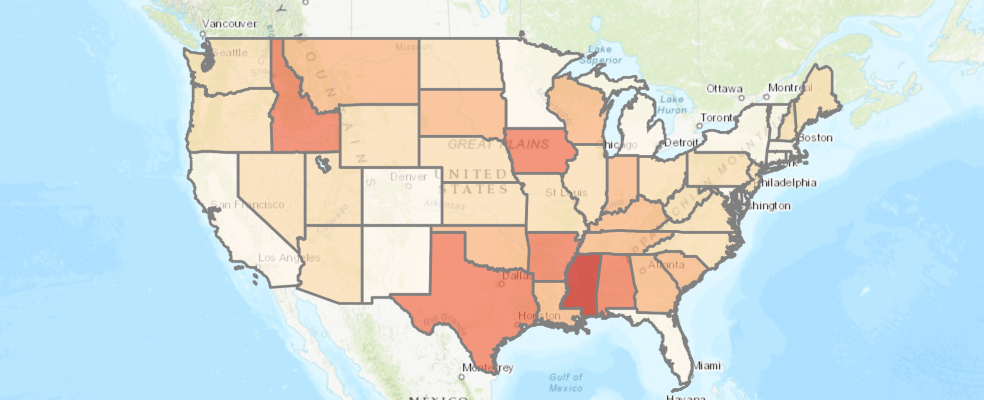

In [32]:
mental_shortage_map = gis.map('USA', zoomlevel=4)
mental_shortage_map

> From this map we can see that, Mississippi is the worst with highest no. of people per mental healthcare provider followed by Alabama, Idaho, Texas, Arkansas and Iowa. 

##### Define Renderer

In [29]:
# Define Renderer
esriTest = {"renderer": { #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"people_per_prov",
                 "transparency":.5,
                 "minValue":1}}

In [30]:
# Define Manual Class breaks
esriTest['renderer']["classBreakInfos"] = [{
  "classMaxValue": 1000.00,
  "label": "0 - 1000.00",
  "description": "0 - 1000.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [255,247,236,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 1500.00,
  "label": "1000.001 - 1500.00",
  "description": "1000.001 - 1500.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [253,220,174,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 2000.00,
  "label": "1500.001 - 2000.00",
  "description": "1500.001 - 2000.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [252,177,123,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 2500.00,
  "label": "2000.001 - 2500.00",
  "description": "2000.001 - 2500.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [241,109,75,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 3000.00,
  "label": "2500.001 - 3000.00",
  "description": "2500.001 - 3000.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [200,28,18,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}]

##### Plot Map

In [31]:
# Plot Map using defined Renderer
mental_shortage_map.remove_layers()
state_mental_df.spatial.plot(map_widget=mental_shortage_map, renderer=esriTest['renderer'])

True

In [26]:
# Add Legend
mental_shortage_map.legend=True

#### Plot Population per Mental Healthcare Provider

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

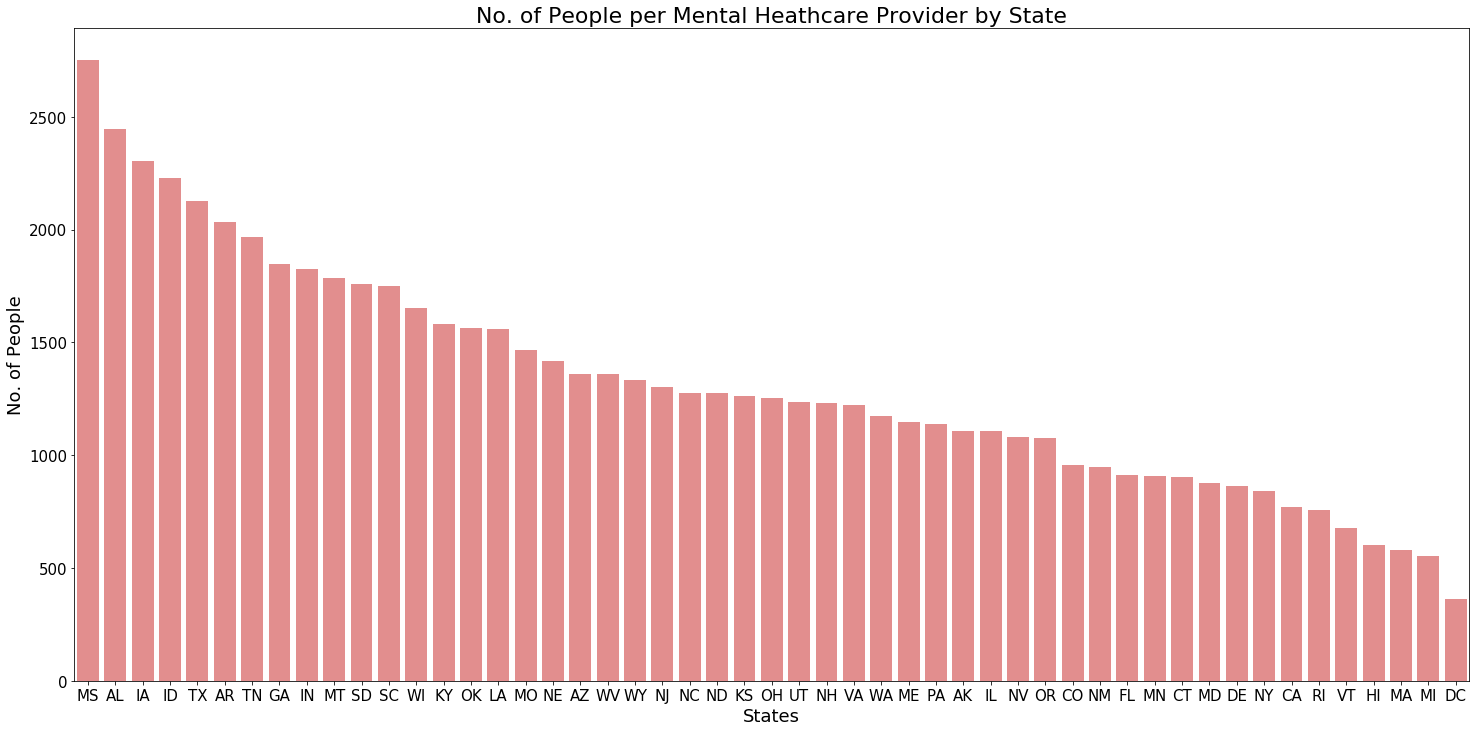

In [33]:
# Plot No. of People per Mental Heathcare Provider by State

plt.figure(figsize=(25,12))
sns.barplot(state_mental_df['regionabbr'], state_mental_df['people_per_prov'], color='lightcoral')
plt.title('No. of People per Mental Heathcare Provider by State', fontsize=22)
plt.xlabel('States', fontsize=18)
plt.ylabel('No. of People', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

> On average, there were ~2754 people per mental healthcare provider in Mississippi compared to ~364 people per provider in DC. The difference is drastic.

### Exploring Mississippi
Mississippi has the highest number of people per mental healthcare provider.
Let's explore Mississippi to find out which counties have the lowest number of providers.

#### Dataframe for Population in Mississippi

In [34]:
# County population df
county_layer = popdensity.layers[46]
MS_pop_df = county_layer.query(where="ST_ABBREV='MS'", out_fields='ST_ABBREV,NAME,TOTPOP_CY', as_df=True)
# MS_pop_df = MS_featureset.sdf
MS_pop_df.head()

OBJECTID ST_ABBREV           NAME  TOTPOP_CY  \
0      1402        MS   Adams County      31455   
1      1403        MS  Alcorn County      37398   
2      1404        MS   Amite County      12573   
3      1405        MS  Attala County      19195   
4      1406        MS  Benton County       8621   

                                               SHAPE  
0  {'rings': [[[-10195353.0856, 3667011.907600000...  
1  {'rings': [[[-9838473.3692, 4163284.5766000003...  
2  {'rings': [[[-10139507.6094, 3675190.789200000...  
3  {'rings': [[[-9957952.5787, 3933319.5100999996...  
4  {'rings': [[[-9917285.3423, 4109418.0692000017...

#### Dataframe for Mental Healthcare Providers in Mississippi by County

In [35]:
# Get provider data for obgyn providers only
mental_MS_df = mental_df[mental_df['regionabbr']=='MS']
mental_MS_df.head()
mental_MS_df.shape

(1108, 12)

In [36]:
# Create dataframe of provider counts by county
mental_MScounty_df = pd.DataFrame(mental_MS_df['subregion'].value_counts().reset_index().values, columns=['County','Provider_Count'])
mental_MScounty_df.head()

County Provider_Count
0       Hinds County            274
1    Harrison County            143
2      Rankin County             81
3       Lamar County             76
4  Lauderdale County             52

#### Merge Provider Count and Population Dataframes for MS

In [37]:
# Merge provider count and women data at county level for ND
county_mental_df = pd.merge(MS_pop_df,mental_MScounty_df,left_on='NAME', right_on='County',how='left')

In [38]:
county_mental_df.head()

OBJECTID ST_ABBREV           NAME  TOTPOP_CY  \
0      1402        MS   Adams County      31455   
1      1403        MS  Alcorn County      37398   
2      1404        MS   Amite County      12573   
3      1405        MS  Attala County      19195   
4      1406        MS  Benton County       8621   

                                               SHAPE         County  \
0  {'rings': [[[-10195353.0856, 3667011.907600000...   Adams County   
1  {'rings': [[[-9838473.3692, 4163284.5766000003...  Alcorn County   
2  {'rings': [[[-10139507.6094, 3675190.789200000...   Amite County   
3  {'rings': [[[-9957952.5787, 3933319.5100999996...  Attala County   
4  {'rings': [[[-9917285.3423, 4109418.0692000017...  Benton County   

  Provider_Count  
0              7  
1             17  
2              1  
3              1  
4              1

In [39]:
# Look at null values
county_mental_df[county_mental_df['Provider_Count'].isnull()]

OBJECTID ST_ABBREV                 NAME  TOTPOP_CY  \
6       1408        MS       Calhoun County      14741   
7       1409        MS       Carroll County      10761   
20      1422        MS        Greene County      13703   
27      1429        MS     Issaquena County       1403   
28      1430        MS      Itawamba County      23998   
34      1436        MS        Kemper County      11049   
39      1441        MS         Leake County      22284   
48      1450        MS    Montgomery County      10326   
51      1453        MS       Noxubee County      11253   
62      1464        MS       Sharkey County       4733   
67      1469        MS  Tallahatchie County      15196   
70      1472        MS    Tishomingo County      19971   
71      1473        MS        Tunica County      10696   
73      1475        MS      Walthall County      14910   
76      1478        MS         Wayne County      20937   
77      1479        MS       Webster County      10001   
78      1480        MS     Wilkinson County       9745   
80      1482        MS     Yalobusha County      12813   

                                                SHAPE County Provider_Count  
6   {'rings': [[[-9934762.5024, 4050466.4952000007...    NaN            NaN  
7   {'rings': [[[-9995030.8747, 3985476.9218999967...    NaN            NaN  
20  {'rings': [[[-9844206.323, 3647602.087700002],...    NaN            NaN  
27  {'rings': [[[-10140770.3187, 3852771.566200003...    NaN            NaN  
28  {'rings': [[[-9836652.7223, 4091317.098099999]...    NaN            NaN  
34  {'rings': [[[-9834842.1274, 3885894.298600003]...    NaN            NaN  
39  {'rings': [[[-9942963.4093, 3886235.154299997]...    NaN            NaN  
48  {'rings': [[[-9963859.1909, 3985594.638899997]...    NaN            NaN  
51  {'rings': [[[-9830021.4908, 3933636.4658999965...    NaN            NaN  
62  {'rings': [[[-10096882.6428, 3908091.835900001...    NaN            NaN  
67  {'rings': [[[-10011127.6731, 4050884.895499997...    NaN            NaN  
70  {'rings': [[[-9832268.1871, 4103713.6533999965...    NaN            NaN  
71  {'rings': [[[-10082866.9102, 4121279.449400000...    NaN            NaN  
73  {'rings': [[[-10023259.2712, 3676463.753600001...    NaN            NaN  
76  {'rings': [[[-9847815.3009, 3723726.849799998]...    NaN            NaN  
77  {'rings': [[[-9909506.3363, 3970154.5622999966...    NaN            NaN  
78  {'rings': [[[-10141113.8026, 3674920.229000002...    NaN            NaN  
80  {'rings': [[[-9996530.4196, 4050817.6086999997...    NaN            NaN

> We can see that, 
* 18 counties in Mississippi do not have any mental healthcare provider.

We will replace NaN values for Provider Count in these counties with 1 to plot them on the map to see which counties have highest number of people per provider.

In [40]:
county_mental_df['Provider_Count'].replace(np.nan,1,inplace=True)

In [41]:
# Create new columns that shows Mental Healthcare provider by population
county_mental_df['people_per_prov'] = county_mental_df['TOTPOP_CY']/county_mental_df['Provider_Count']

#### Plot Shortage


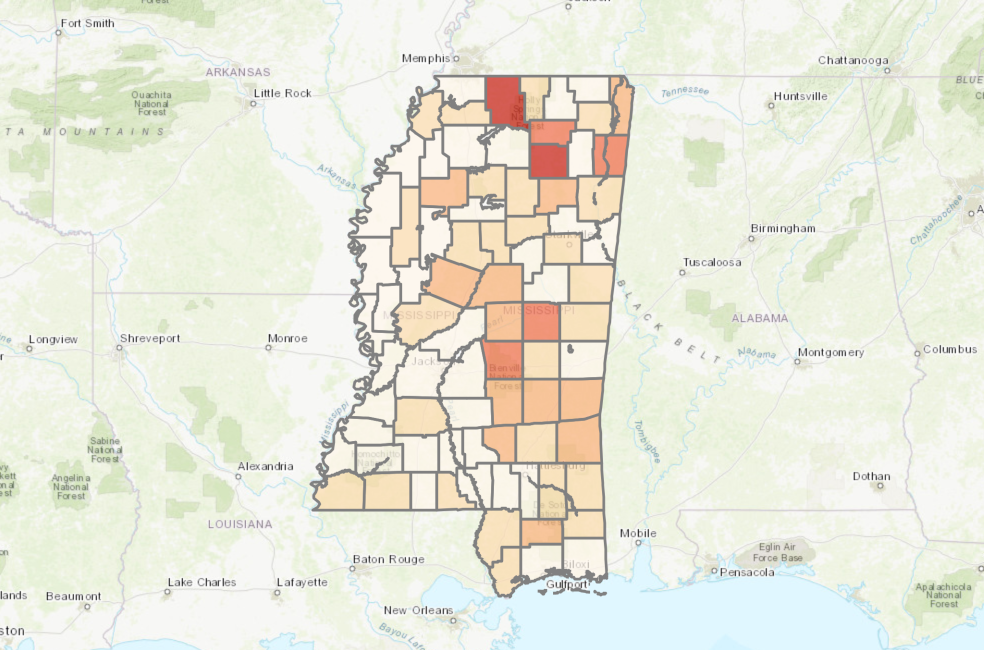

In [48]:
mental_countyshortage_map = gis.map('Mississippi, USA', zoomlevel=6)
mental_countyshortage_map

> We can see that,
* Marshall County seems to be the worst with 1 provider for 37137 people. Some other counties with high population per provider are Pontotoc, Neshoba, Scott and Union.

##### Define Renderer

In [43]:
# Define Renderer
mentalCountyTest = {"renderer": { #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"people_per_prov",
                 "transparency":.5,
                 "minValue":1}}

In [44]:
# Define Manual Class breaks
mentalCountyTest['renderer']["classBreakInfos"] = [{
  "classMaxValue": 7500.00,
  "label": "0 - 7500.00",
  "description": "0 - 7500.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [255,247,236,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 15000.00,
  "label": "7500.001 - 15000.00",
  "description": "7500.001 - 15000.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [253,220,174,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 22500.00,
  "label": "15000.001 - 22500.00",
  "description": "15000.001 - 22500.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [252,177,123,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 30000.00,
  "label": "22500.001 - 30000.00",
  "description": "22500.001 - 30000.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [241,109,75,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 37500.00,
  "label": "30000.001 - 37500.00",
  "description": "30000.001 - 37500.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [200,28,18,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}]

##### Plot Map

In [45]:
# Plot Map using defined Renderer
mental_countyshortage_map.remove_layers()
county_mental_df.spatial.plot(map_widget=mental_countyshortage_map, renderer=mentalCountyTest['renderer'])

True

In [47]:
# Change height of map
mental_countyshortage_map.layout.height="650px"

In [41]:
mental_countyshortage_map.legend = True

In [46]:
test = county_mental_df.sort_values(by='people_per_prov', ascending=False)[['NAME','TOTPOP_CY','Provider_Count','people_per_prov']]
test.head()

NAME  TOTPOP_CY  Provider_Count  people_per_prov
46  Marshall County      37137               1          37137.0
57  Pontotoc County      32007               1          32007.0
49   Neshoba County      29483               1          29483.0
61     Scott County      29144               1          29144.0
72     Union County      28734               1          28734.0

###### Marshall County Infographic

To visualize high level key facts about a geography and gain greater insights, various infographics can be created using ArcGIS Business Analyst. Learn more about [ArcGIS Business Analyst](https://www.esri.com/en-us/arcgis/products/arcgis-business-analyst/overview).

The image below shows an infographic of key facts for `Marshall County, MS`.
<img src="Marshall County.jpg">

To summarize, Mississippi has the highest number of people per Mental Healthcare Provider. Also:
1. There were ~2754 people per mental healthcare provider in Mississippi compared to ~364 people per provider in DC
2. 18 counties in Mississippi do not have any mental healthcare provider
3. Marshall County seems to be the worst with 1 provider for 37137 people. Some other counties with high population per provider are Pontotoc, Neshoba, Scott and Union

## Women's Health

<img src="Obgyn.jpg">
Image source: https://www.aamc.org/news-insights/labor-pains-ob-gyn-shortage

- [Half of U.S. counties](https://news.aamc.org/patient-care/article/labor-pains-obgyn-shortage/) lack a single OB-GYN and women’s lives are endangered by long treks for much-needed care.
- With a severe [shortage of obstetrician/gynecologists](https://www.medpagetoday.com/obgyn/generalobgyn/73785) forecasted, some metropolitan areas are prone to crisis-level conditions.
- By 2020, there will be a shortage of up to 8,800 OB-GYNs, and the [shortage may grow](http://fortune.com/2018/06/27/these-cities-are-most-likely-to-face-an-ob-gyn-shortage-by-2020/) upto 22,000 by 2050.

Let's explore the distribution of OBGYN health providers in US using a heatmap.

Note - Provider Taxonomy codes were filtered for OB-GYN providers using this [reference](http://www.wpc-edi.com/reference/codelists/healthcare/health-care-provider-taxonomy-code-set/).

| Taxonomy Code | Description                                             |
| ------------- | ------------------------------------------------------- |
| 207V00000X    | Obstetrics & Gynecology                                 |
| 207VC0200X    | Critical Care Medicine                                  |
| 207VF0040X    | Female Pelvic Medicine and Reconstructive Surgery       |
| 207VX0201X    | Gynecologic Oncology                                    |
| 207VG0400X    | Gynecology                                              |
| 207VH0002X    | Hospice and Palliative Medicine                         |
| 207VM0101X    | Maternal & Fetal Medicine                               |
| 207VB0002X    | Obesity Medicine                                        |
| 207VX0000X    | Obstetrics                                              |
| 207VE0102X    | Reproductive Endocrinology                              |
| 363LX0001X    | Nurse Practitioner-Obstetrics & Gynecology              |
| 163WR1000X    | Registered Nurse-Reproductive Endocrinology/Infertility |
| 163WW0101X    | Registered Nurse-Women's Health Care, Ambulatory        |
| 282NW0100X    | General Acute Care Hospital - Women                     |

### OBGYN Providers - Heat Map


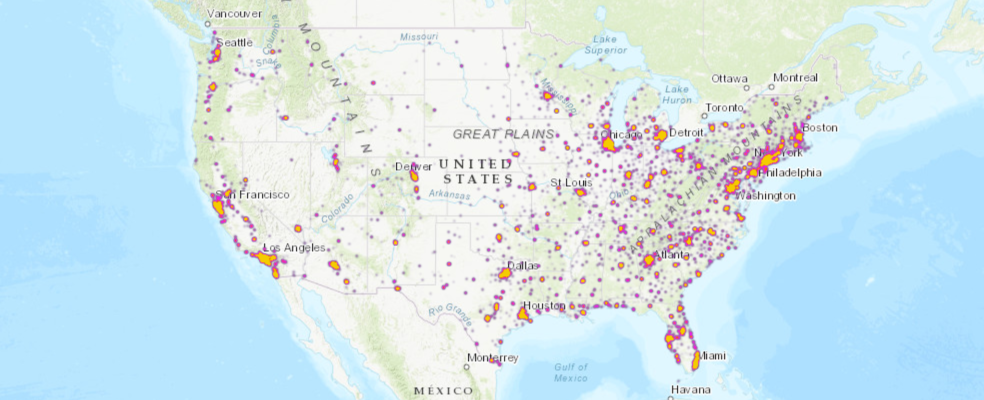

In [51]:
# Create Map
women_map = gis.map('USA', 4)
women_map

This map paints a grim picture of the availability of OBGYN healthcare providers. We can see vast areas in Midwest and West with NO or very few OBGYN providers. 

In [50]:
# Define renderer and add provider data for OBGYN providers
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
            "type": "heatmap",
            "blurRadius":1,  # changes the size of the clusters
            "maxPixelIntensity":2,
            "minPixelIntensity":0,
            "field":None}
renderer["colorStops"] = [{"ratio":0,"color":[63, 40, 102, 0]},
                          {"ratio":0.25,"color":[167,97,170,179]},
                          {"ratio":0.50,"color":"#7b3ce9"},
                          {"ratio":0.75,"color":[222,102,0,179]},
                          {"ratio":1,"color":[244,204,0,179]}]
women_map.add_layer(provider_data_layer,
               { "type": "FeatureLayer",
                 "renderer": renderer,
                "definition_expression" : "user_taxonomy_code_1 in ('207V00000X','207VC0200X','207VF0040X','207VX0201X','207VG0400X','207VH0002X','207VM0101X','207VB0002X','207VX0000X','207VE0102X','363LX0001X','163WR1000X','163WW0101X','282NW0100X')"
#                 "definition_expression" : "user_taxonomy_code_1 = '207VC0200X' or user_taxonomy_code_1 = '207V00000X'"
                })

In [31]:
# Remove Layer
women_map.remove_layers()

True

### Mothers to Providers Ratio by State

In this section our goal is to identify which states have the highest mother's to providers ratio. Let's get data from the American Community Survey (ACS) about fertility in past 12 months by age of mother using ACS_Fertility_by_Age_Boundaries layer at State, County and Tract level. We will merge OBGYN providers data with Fertility data to achieve this.

#### Get the layers

<Item title:"ACS Fertility in Past 12 Months by Age Variables - Boundaries" type:Feature Layer Collection owner:esri_livingatlas>
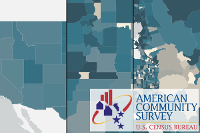

In [56]:
fertility_item = gis.content.get('7995cd11748249fb8e23c4a5ad901dde')
fertility_item

In [57]:
fertility_item.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/1">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Fertility_by_Age_Boundaries/FeatureServer/2">]

In [58]:
# Define layers for State, County and Tract (Percent of women 15 to 50 who had a birth in the past 12 months)
fertility_state = fertility_item.layers[0]
fertility_county = fertility_item.layers[1]
fertility_tract = fertility_item.layers[2]

#### Dataframe for women population by State 
We will use the fertility layer at state level to create this dataframe

In [59]:
# State population dataframe
fertility_featureset = fertility_state.query(where="B13016_001E>1")
fertility_df = fertility_featureset.sdf
fertility_df.head()

OBJECTID   STATENS GEOID STUSPS        NAME          ALAND        AWATER  \
0         1  01779775    01     AL     Alabama   131174048583    4593327154   
1         2  01785533    02     AK      Alaska  1478839695958  245481577452   
2         3  01779777    04     AZ     Arizona   294198551143    1027337603   
3         4  00068085    05     AR    Arkansas   134768872727    2962859592   
4         5  01779778    06     CA  California   403503931312   20463871877   

   B13016_001E  B13016_001M  B13016_002E  B13016_002M  B13016_003E  \
0      1148528         1509        60165         1702         2589   
1       173058          528        10777          673          505   
2      1598426         1260        87762         2110         3435   
3       690046         1218        40212         1649         2509   
4      9632116         4019       473280         5293        13945   

   B13016_003M  B13016_004E  B13016_004M  B13016_005E  B13016_005M  \
0          441        14746          793        19098         1127   
1          165         2225          253         3105          378   
2          460        17844         1040        24962         1126   
3          364        10514          749        12755          850   
4          824        70111         2050       118935         2794   

   B13016_006E  B13016_006M  B13016_007E  B13016_007M  B13016_008E  \
0        14125          810         6813          626         1958   
1         2921          345         1512          295          396   
2        22224         1223        13423          836         3793   
3         8907          646         4078          511         1032   
4       139069         2870        90663         1976        29631   

   B13016_008M  B13016_009E  B13016_009M  B13016_010E  B13016_010M  \
0          470          836          220      1088363         2107   
1          124          113           58       162281          896   
2          412         2081          349      1510664         2549   
3          229          417          124       649834         2039   
4         1189        10926          665      9158836         6208   

   B13016_011E  B13016_011M  B13016_012E  B13016_012M  B13016_013E  \
0       157525         1206       150435         1182       146461   
1        21785          316        21903          344        25874   
2       225915          906       215683         1230       209585   
3        95475          960        89255         1069        87751   
4      1249040         1197      1287203         2032      1351804   

   B13016_013M  B13016_014E  B13016_014M  B13016_015E  B13016_015M  \
0         1338       141576         1091       146885         2355   
1          490        23998          394        21932          588   
2         1152       199483         1217       202196         2727   
3          976        85585          881        91184         1830   
4         2786      1255168         2815      1218690         5003   

   B13016_016E  B13016_016M  B13016_017E  B13016_017M  B13016_calc_pctBirthsE  \
0       152368         2244       193113         1484                     5.2   
1        20641          618        26148          438                     6.2   
2       204064         2534       253738         1365                     5.5   
3        88977         1731       111607         1242                     5.8   
4      1239157         4885      1557774         4047                     4.9   

   B13016_calc_pctBirthsM  B13016_calc_num15to19E  B13016_calc_num15to19M  \
0                0.147986                  160114                    1284   
1                0.388132                   22290                     356   
2                0.131806                  229350                    1016   
3                0.238563                   97984                    1027   
4                0.054885                 1262985                    1453   

   B13016_calc_pct15to19E  B13016_calc_pct15to19M  B

#### Dataframe for OB-GYN providers by state
We will use `provider_data_layer` to subset OB-GYN providers

In [61]:
# Get provider data for obgyn providers only

%time obgyn_df = provider_data_layer.query(where="user_taxonomy_code_1 in ('207V00000X','207VC0200X','207VF0040X','207VX0201X','207VG0400X','207VH0002X','207VM0101X','207VB0002X','207VX0000X','207VE0102X','363LX0001X','163WR1000X','163WW0101X','282NW0100X')", out_fields='user_npi,user_entity_type,user_provider_gender,user_taxonomy_code_1,user_full_address,postal,city,subregion,region,regionabbr', as_df=True)

obgyn_df.head()

Wall time: 3min 21s


SHAPE           city  objectid  \
0  {'x': -73.65232661699997, 'y': 43.305579428000...    Glens Falls       260   
1  {'x': -73.87456049999997, 'y': 41.333477489000...  Putnam Valley       393   
2  {'x': -73.95404266899999, 'y': 40.663727453000...       Brooklyn       455   
3  {'x': -77.29022343299994, 'y': 42.874792656000...    Canandaigua       574   
4  {'x': -73.60075714899995, 'y': 40.734165116000...    Garden City       734   

  postal    region regionabbr       subregion user_entity_type  \
0  12801  New York         NY   Warren County       Individual   
1  10579  New York         NY   Putnam County     Organization   
2  11225  New York         NY    Kings County       Individual   
3  14424  New York         NY  Ontario County       Individual   
4  11530  New York         NY   Nassau County     Organization   

                                   user_full_address      user_npi  \
0         45 HUDSON AVE, , GLENS FALLS, NY 128014313  1.659501e+09   
1  11 PEEKSKILL HOLLOW RD # 204, , PUTNAM VALLEY,...  1.013428e+09   
2          249 EMPIRE BLVD, , BROOKLYN, NY 112253402  1.841430e+09   
3        335 PARRISH ST, , CANANDAIGUA, NY 144241728  1.235132e+09   
4       901 STEWART AVE, , GARDEN CITY, NY 115304893  1.346479e+09   

  user_provider_gender user_taxonomy_code_1  
0                    F           207V00000X  
1                 None           207VX0201X  
2                    M           207V00000X  
3                    M           207V00000X  
4                 None           207VM0101X

In [47]:
# Create a csv
# obgyn_df.to_csv(r'C:\Users\mohi9282\Desktop\arcgis\DATAFRAMES\allObgynProviders_df.csv', index=None, header=True)

In [62]:
# Create dataframe of obgyn provider counts by state
obgyn_count_df = pd.DataFrame(obgyn_df['regionabbr'].value_counts().reset_index().values, columns=['regionabbr','Provider_Count'])

Text(0, 0.5, 'Provider Count')

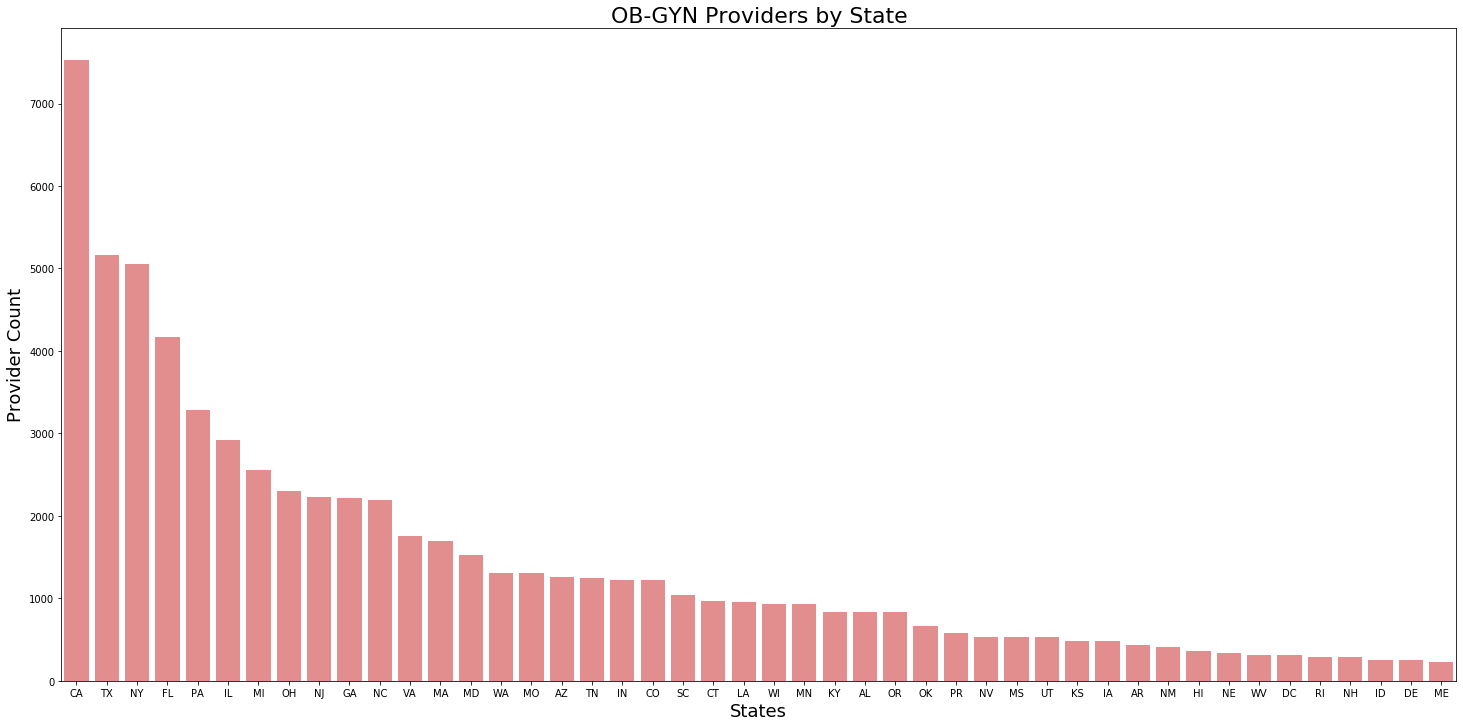

In [63]:
# Plot OB-GYN Providers by State

plt.figure(figsize=(25,12))
sns.barplot(obgyn_count_df['regionabbr'].iloc[:-8], obgyn_count_df['Provider_Count'].iloc[:-8], color='lightcoral')
plt.title('OB-GYN Providers by State', fontsize=22)
plt.xlabel('States', fontsize=18)
plt.ylabel('Provider Count', fontsize=18)

#### Merge Provider Count and Population Dataframes

In [64]:
# Merge provider count and women_df at state level
state_obgyn_df = pd.merge(fertility_df,obgyn_count_df,right_on='regionabbr', left_on='STUSPS',how='inner')

In [65]:
# Create new columns that shows provider by women pop
state_obgyn_df['women_per_prov'] = state_obgyn_df['B13016_001E']/state_obgyn_df['Provider_Count']
# Create new columns that shows provider by mother pop
state_obgyn_df['mother_per_prov'] = state_obgyn_df['B13016_002E']/state_obgyn_df['Provider_Count']

In [66]:
# Arrange dataframe by mother_per_prov descending
state_obgyn_df = state_obgyn_df.sort_values(by=['mother_per_prov'], ascending=False)

In [67]:
state_obgyn_df = state_obgyn_df.loc[:,['OBJECTID','SHAPE','regionabbr','Provider_Count','women_per_prov','mother_per_prov']]
state_obgyn_df.head()

OBJECTID                                              SHAPE regionabbr  \
34        35  {'rings': [[[-10823452.8858, 6274958.149], [-1...         ND   
44        45  {'rings': [[[-12139394.6091, 5012444.5138], [-...         UT   
12        13  {'rings': [[[-12918526.7316, 6275006.0277], [-...         ID   
3          4  {'rings': [[[-9989043.0946, 4300705.9503], [-9...         AR   
41        42  {'rings': [[[-10749419.778, 5769979.5139], [-1...         SD   

   Provider_Count women_per_prov mother_per_prov  
34            102        1661.49         111.353  
44            526        1441.92         99.9943  
12            250        1535.15           93.66  
3             440        1568.29         91.3909  
41            137        1368.78         91.0584

In [54]:
# Write df to csv
# state_obgyn_df.to_csv(r'C:\Users\mohi9282\Desktop\arcgis\DATAFRAMES\ObgynProviders_StateLevel_df.csv', index=None, header=True)

In [68]:
state_obgyn_df.spatial.geometry_type

['polygon']

#### Plot Shortage 

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)


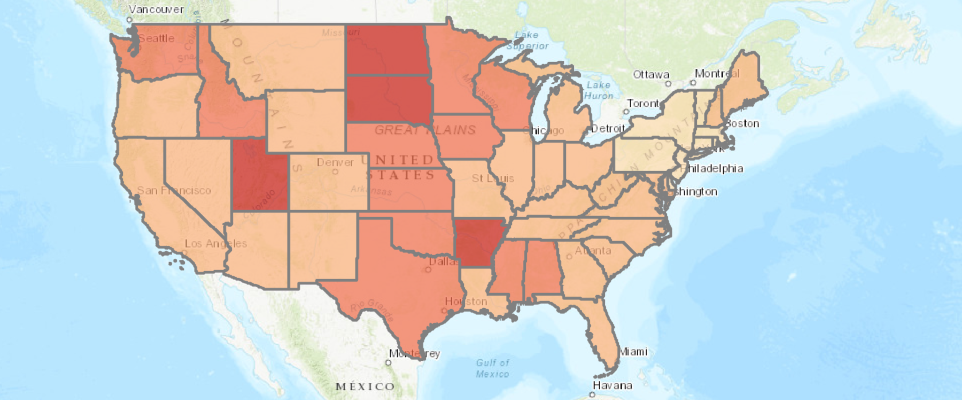

In [56]:
obgyn_shortage_map = gis.map('USA', zoomlevel=4)
obgyn_shortage_map

> From this map, we can see that number of women (15 to 50) who had a birth in the past 12 months per OBGYN provider is high in Utah, North Dakota, South Dakota and Arkansas.

| State | Mo. of Mothers per OBGYN provider |
|-------|-----------------------------------|
| ND    | 112                               |
| UT    | 100                               |
| AR    | 93                                |
| SD    | 93                                |
| ID    | 92                                |

##### Define Renderer

In [57]:
# Define Renderer
stateObgynTest = {"renderer": { #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"mother_per_prov",
                 "transparency":.5,
                 "minValue":1}}

In [58]:
# Define Manual Class breaks
stateObgynTest['renderer']["classBreakInfos"] = [{
  "classMaxValue": 23.00,
  "label": "0 - 23.00",
  "description": "0 - 23.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [255,247,236,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 46.00,
  "label": "23.001 - 46.00",
  "description": "23.001 - 46.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [253,220,174,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 69.00,
  "label": "46.001 - 69.00",
  "description": "46.001 - 69.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [252,177,123,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 92.00,
  "label": "69.001 - 92.00",
  "description": "69.001 - 92.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [241,109,75,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 115.00,
  "label": "92.001 - 115.00",
  "description": "92.001 - 115.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [200,28,18,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}]

##### Plot Map

In [59]:
# Plot Map using defined Renderer
obgyn_shortage_map.remove_layers()
state_obgyn_df.spatial.plot(map_widget=obgyn_shortage_map, renderer=stateObgynTest['renderer'])

True

In [60]:
obgyn_shortage_map.legend=True

In [205]:
obgyn_shortage_map.remove_layers()

True

#### Plot Mothers per OBGYN Provider

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

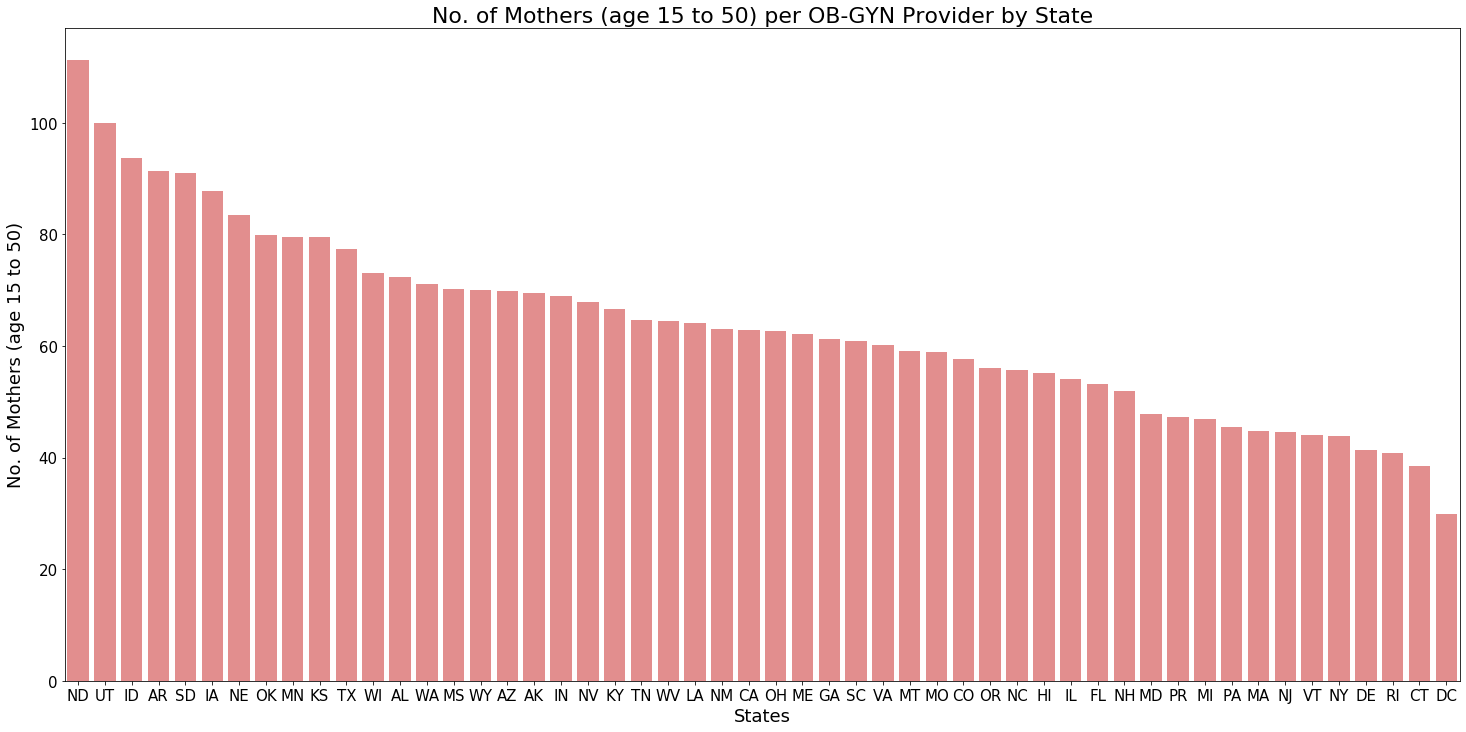

In [69]:
# Plot No. of Mothers (age 15 to 50) per OB-GYN Provider by State

plt.figure(figsize=(25,12))
sns.barplot(state_obgyn_df['regionabbr'], state_obgyn_df['mother_per_prov'],color='lightcoral')
plt.title('No. of Mothers (age 15 to 50) per OB-GYN Provider by State', fontsize=22)
plt.xlabel('States', fontsize=18)
plt.ylabel('No. of Mothers (age 15 to 50)', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

> On average, there were ~112 mothers and 1655 women per provider in ND compared to ~31 mothers and 662 women per provider in DC. The difference is drastic.

### Exploring North Dakota
North Dakota has the highest number of mothers and women per OB-GYN provider. From the fertility map above, we also saw that percent of women (15 to 50) who had a birth in the past 12 months is high in North Dakota. 

Let's explore North Dakota to find out which counties have the lowest number of OBGYN providers.

#### Dataframe for women population in North Dakota

In [70]:
# State population df
ND_fertility_df = fertility_county.query(where="STATE='North Dakota'", as_df=True)
ND_fertility_df.head()

OBJECTID  COUNTYNS  GEOID       ALAND     AWATER              NAME  \
0      1991  01034210  38001  2557900104    2894336      Adams County   
1      1992  01034225  38003  3863107416   56591280     Barnes County   
2      1993  01034216  38005  3596569006  131708143     Benson County   
3      1994  01035616  38007  2975481849   11990485   Billings County   
4      1995  01034227  38009  4321196488   74864998  Bottineau County   

          State  B13016_001E  B13016_001M  B13016_002E  B13016_002M  \
0  North Dakota          425           50            7           10   
1  North Dakota         2185          110          145           63   
2  North Dakota         1359           11          118           37   
3  North Dakota          159           31            3            4   
4  North Dakota         1182           44           81           46   

   B13016_003E  B13016_003M  B13016_004E  B13016_004M  B13016_005E  \
0            0            9            0            9            0   
1            0           15            0           15          112   
2           12           13           51           22           23   
3            0            9            0            9            1   
4            0           13           11           11           10   

   B13016_005M  B13016_006E  B13016_006M  B13016_007E  B13016_007M  \
0            9            0            9            7           10   
1           52           11           12           22           32   
2           13           18           11            7            7   
3            3            0            9            2            3   
4           10           18           25           42           35   

   B13016_008E  B13016_008M  B13016_009E  B13016_009M  B13016_010E  \
0            0            9            0            9          418   
1            0           15            0           15         2040   
2            7            7            0           13         1241   
3            0            9            0            9          156   
4            0           13            0           13         1101   

   B13016_010M  B13016_011E  B13016_011M  B13016_012E  B13016_012M  \
0           55           49           25           51           23   
1          124          365           63          364           87   
2           39          227           18          156           23   
3           31           16           16            7            6   
4           62          167           38          157           43   

   B13016_013E  B13016_013M  B13016_014E  B13016_014M  B13016_015E  \
0           50           22           68           23           38   
1          178           63          236           12          274   
2          178           13          170           10          163   
3           13           12           31           17           32   
4          122           11          133           19          148   

   B13016_015M  B13016_016E  B13016_016M  B13016_017E  B13016_017M  \
0           24           96           29           66           28   
1           77          251           58          372           60   
2           26          131           24          216           12   
3           15           26           16           31           15   
4           42          140           34          234           37   

   B13016_calc_pctBirthsE  B13016_calc_pctBirthsM  B13016_calc_num15to19E  \
0                     1.6                2.352622                      49   
1                     6.6                2.876939                     365   
2                     8.7                2.712308                     239   
3                     1.9                2.515275                      16   
4                     6.9                3.882560                     167   

   B13016_calc_num15to19M  B13016_calc_pct15to19E  B13016_calc_pct15to19M  \
0                      27                     0.0               18.3673

#### Dataframe for OB-GYN providers in North Dakota by County

In [71]:
obgyn_ND_df = obgyn_df[obgyn_df['regionabbr']=='ND']
obgyn_ND_df.head()

SHAPE         city  \
58458  {'x': -96.78767519099995, 'y': 46.884720309000...        Fargo   
58459  {'x': -97.06651079899996, 'y': 47.912072701000...  Grand Forks   
58460  {'x': -99.74991768599995, 'y': 48.838085857000...     Belcourt   
58461  {'x': -100.77651963899996, 'y': 46.80847046400...     Bismarck   
58462  {'x': -100.77651963899996, 'y': 46.80847046400...     Bismarck   

       objectid postal        region regionabbr           subregion  \
58458   4972067  58102  North Dakota         ND         Cass County   
58459   4972187  58201  North Dakota         ND  Grand Forks County   
58460   4972639  58316  North Dakota         ND      Rolette County   
58461   4972840  58501  North Dakota         ND     Burleigh County   
58462   4972850  58501  North Dakota         ND     Burleigh County   

      user_entity_type                                  user_full_address  \
58458       Individual                  801 BROADWAY N, , FARGO, ND 58122   
58459       Individual  1000 SOUTH COLUMBIA ROAD, , GRAND FORKS, ND 58...   
58460       Individual        1 HOSPITAL ROAD NORTH, , BELCOURT, ND 58316   
58461       Individual        1000 E ROSSER AVE, , BISMARCK, ND 585014414   
58462       Individual        1000 E ROSSER AVE, , BISMARCK, ND 585014414   

           user_npi user_provider_gender user_taxonomy_code_1  
58458  1.851398e+09                    M           207VM0101X  
58459  1.366440e+09                    M           207V00000X  
58460  1.164496e+09                    M           207V00000X  
58461  1.982658e+09                    M           207V00000X  
58462  1.093769e+09                    M           207V00000X

In [72]:
obgyn_ND_df.shape

(102, 12)

In [73]:
# Create dataframe of obgyn provider counts by county
obgyn_NDcounty_df = pd.DataFrame(obgyn_ND_df['subregion'].value_counts().reset_index().values, columns=['County','Provider_Count'])
obgyn_NDcounty_df.head()

County Provider_Count
0         Cass County             37
1     Burleigh County             22
2  Grand Forks County             13
3         Ward County             10
4     Williams County              8

#### Merge Provider Count and Population Dataframes

In [74]:
# Merge provider count and women data at county level for ND
county_obgyn_df = pd.merge(ND_fertility_df,obgyn_NDcounty_df,left_on='NAME', right_on='County',how='left')

In [75]:
# Look at null values
county_obgyn_df[county_obgyn_df['Provider_Count'].isnull()][['NAME','Provider_Count']]

NAME Provider_Count
0           Adams County            NaN
1          Barnes County            NaN
2          Benson County            NaN
3        Billings County            NaN
4       Bottineau County            NaN
5          Bowman County            NaN
6           Burke County            NaN
9        Cavalier County            NaN
10         Dickey County            NaN
11         Divide County            NaN
12           Dunn County            NaN
13           Eddy County            NaN
14         Emmons County            NaN
15         Foster County            NaN
16  Golden Valley County            NaN
18          Grant County            NaN
19         Griggs County            NaN
20      Hettinger County            NaN
21         Kidder County            NaN
22        LaMoure County            NaN
23          Logan County            NaN
24        McHenry County            NaN
25       McIntosh County            NaN
26       McKenzie County            NaN
27         McLean County            NaN
28         Mercer County            NaN
29         Morton County            NaN
30      Mountrail County            NaN
31         Nelson County            NaN
32         Oliver County            NaN
33        Pembina County            NaN
34         Pierce County            NaN
35         Ramsey County            NaN
36         Ransom County            NaN
37       Renville County            NaN
40        Sargent County            NaN
41       Sheridan County            NaN
43          Slope County            NaN
45         Steele County            NaN
47         Towner County            NaN
48         Traill County            NaN
49          Walsh County            NaN
51          Wells County            NaN

> We can see that:
* 43 out of 53 counties in ND do not have any Obgyn healthcare providers. 

We will replace NaN values for Provider Count in these counties with 1 to plot them on the map to see which counties have highest number of mothers per provider.

In [76]:
# Replace NaN with 1
county_obgyn_df['Provider_Count'].replace(np.nan,1,inplace=True)

In [77]:
# Create new columns that shows provider by women pop
county_obgyn_df['women_per_prov'] = county_obgyn_df['B13016_001E']/county_obgyn_df['Provider_Count']
# Create new columns that shows provider by mother pop
county_obgyn_df['mother_per_prov'] = county_obgyn_df['B13016_002E']/county_obgyn_df['Provider_Count']

In [78]:
# Arrange dataframe by mother_per_prov descending and then B13016_002E (women who gave birht) descending 
county_obgyn_df = county_obgyn_df.sort_values(by=['mother_per_prov','B13016_002E'], ascending=False)[['OBJECTID','SHAPE','NAME','Provider_Count','B13016_001E','B13016_002E','women_per_prov','mother_per_prov']]
county_obgyn_df.columns = ['OBJECTID','SHAPE','Name','Provider_Count', "Total Women (15 to 50)","Women who had birth (past 12 months)", 'women_per_prov', 'mother_per_prov']
county_obgyn_df.head()

OBJECTID                                              SHAPE  \
29      2020  {'rings': [[[-11236143.3632, 5939274.8243], [-...   
38      2029  {'rings': [[[-10773989.0107, 5881971.3849], [-...   
46      2037  {'rings': [[[-11050272.8328, 5995646.2405], [-...   
10      2001  {'rings': [[[-10913159.7795, 5825785.1309], [-...   
1       1992  {'rings': [[[-10904992.8409, 5981421.7966], [-...   

               Name  Provider_Count  Total Women (15 to 50)  \
29    Morton County               1                    6598   
38  Richland County               1                    3342   
46  Stutsman County               2                    4237   
10    Dickey County               1                    1011   
1     Barnes County               1                    2185   

    Women who had birth (past 12 months)  women_per_prov  mother_per_prov  
29                                   555          6598.0            555.0  
38                                   228          3342.0            228.0  
46                                   315          2118.5            157.5  
10                                   151          1011.0            151.0  
1                                    145          2185.0            145.0

#### Plot Shortage

MapView(layout=Layout(height='400px', width='100%'), zoom=6.0)


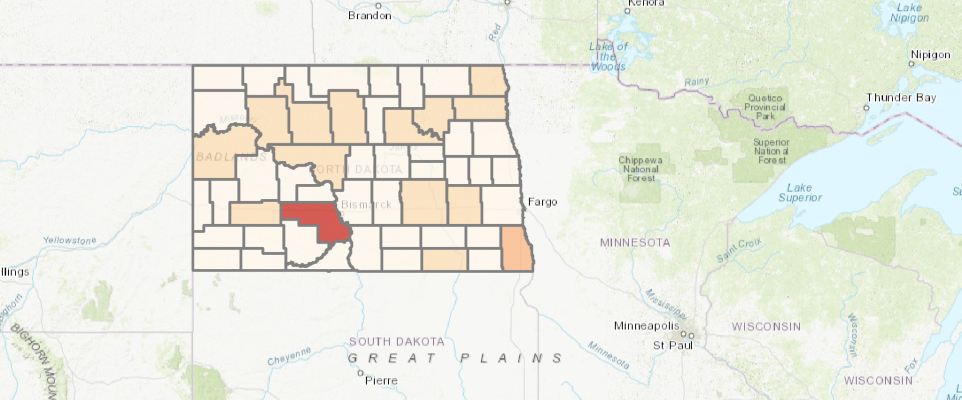

In [75]:
obgyn_countyshortage_map = gis.map('North Dakota, USA', zoomlevel=6)
obgyn_countyshortage_map

> We can see that:
- Morton County seems to be the worst with 463 women who gave birth but no provider.

##### Define Renderer

In [76]:
# Define Renderer
obgynCountyTest = {"renderer": { #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"mother_per_prov",
                 "transparency":.5,
                 "minValue":1}}

In [77]:
# Define Manual Class breaks
obgynCountyTest['renderer']["classBreakInfos"] = [{
  "classMaxValue": 100.00,
  "label": "0 - 100.00",
  "description": "0 - 100.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [255,247,236,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 200.00,
  "label": "100.001 - 200.00",
  "description": "100.001 - 200.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [253,220,174,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 300.00,
  "label": "200.001 - 300.00",
  "description": "200.001 - 300.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [252,177,123,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 400.00,
  "label": "300.001 - 400.00",
  "description": "300.001 - 400.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [241,109,75,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 500.00,
  "label": "400.001 - 500.00",
  "description": "400.001 - 500.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [200,28,18,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}]

##### Plot Map

In [78]:
# Plot Map using defined Renderer
obgyn_countyshortage_map.remove_layers()
county_obgyn_df.spatial.plot(map_widget=obgyn_countyshortage_map, renderer=obgynCountyTest['renderer'])

True

In [79]:
obgyn_countyshortage_map.legend=True

In [206]:
obgyn_countyshortage_map.remove_layers()

True


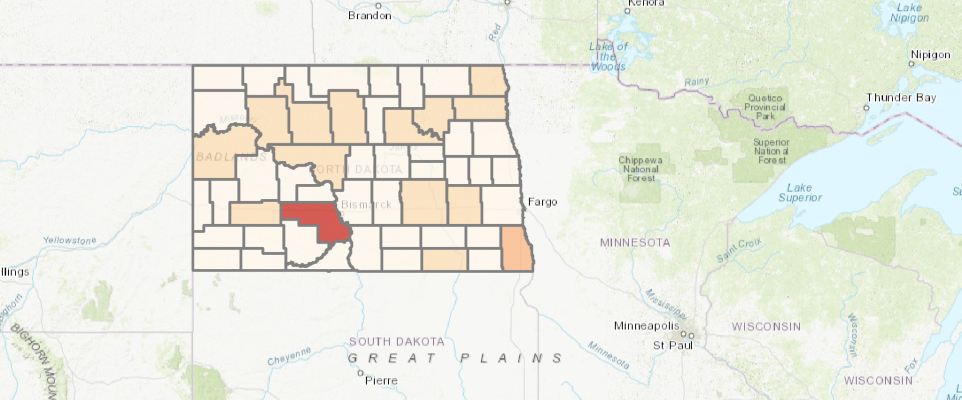

In [80]:
obgyn_countyshortage_map.take_screenshot(set_as_preview=True)

###### Morton County Infographic

To visualize high level key facts about a geography and gain greater insights, various infographics can be created using ArcGIS Business Analyst. 
Learn more about [ArcGIS Business Analyst](https://www.esri.com/en-us/arcgis/products/arcgis-business-analyst/overview).

The image below shows an infographic of key facts for `Morton County, ND`.
<img src="Morton County.jpg">

North Dakota has the highest number of women (15 to 50) who had a birth in the past 12 months per OBGYN provider. Also:
1. There were ~112 mothers and 1655 women per provider in ND compared to ~31 mothers and 662 women per provider in DC
2. 43 out of 53 counties in ND do not have any OBGYN healthcare provider
3. Morton County seems to be the worst with 463 women who gave birth but no provider

### Summary

To summarize, we explored the shortage of Mental Health and OBGYN Providers accross United States. We saw that:
1. Mississippi has the highest number of people per Mental Healthcare Provider
    - There were ~2754 people per mental healthcare provider in Mississippi compared to ~364 people per provider in DC.
    - 18 counties in Mississippi do not have any mental healthcare provider.
    - Marshall County seems to be the worst with 1 provider for 37137 people. Some other counties with high population per provider are Pontotoc, Neshoba, Scott and Union.


2. North Dakota has the highest number of women (15 to 50) who had a birth in the past 12 months per OBGYN provider.
    - There were ~112 mothers and 1655 women per provider in ND compared to ~31 mothers and 662 women per provider in DC.
    - 43 out of 53 counties in ND do not have any OBGYN healthcare provider.
    - Morton County seems to be the worst with 463 women who gave birth but no provider.